In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
orig = pd.read_csv("../../CUI_23/metrics/valence/Sentence_test_sets_metrics.csv")
mixed_increased_balanced = pd.read_csv("metrics_test/mixed_increased_pred_balancer.csv")
mixed_balanced = pd.read_csv("metrics_test/mixed_pred_balancer.csv")
mixed = pd.read_csv("metrics_test/mixed_pred.csv")

In [5]:
rows = ["GLoHBCD", "Instagram Data", "Smoke Stop Forum", "Synthetic GPT3 Data", 
        "Health Coach Dialogue Corpus", "DARN-CT-based Wizard of Oz Dialogues", 
        "Optifast Mock-Chatbot"]
orig = orig[orig["Unnamed: 1"].isin(rows)].copy()
mixed_increased_balanced = mixed_increased_balanced[mixed_increased_balanced["Unnamed: 1"].isin(rows)].copy()
mixed_balanced[mixed_balanced["Unnamed: 1"].isin(rows)].copy()
mixed[mixed["Unnamed: 1"].isin(rows)].copy()
orig.head()

,Unnamed: 0,Unnamed: 1,accuracy,f1,precision,recall
9,0,GLoHBCD,0.772727,0.722221,0.730979,0.715839
10,0,Smoke Stop Forum,0.756798,0.684440,0.686997,0.682146
11,0,Health Coach Dialogue Corpus,0.855984,0.683383,0.724424,0.660667
12,0,Synthetic GPT3 Data,0.810811,0.803788,0.807663,0.801200
13,0,DARN-CT-based Wizard of Oz Dialogues,0.957746,0.774603,0.700000,0.978261


In [6]:
mixed_increased_balanced["condition"] = "Increased Mixed Predicted Balanced"
orig["condition"] = "Original"
mixed_balanced["condition"] = "Mixed Predicted Balanced"
mixed["condition"] = "Mixed Predicted"

data = pd.concat([orig, mixed, mixed_balanced, mixed_increased_balanced])

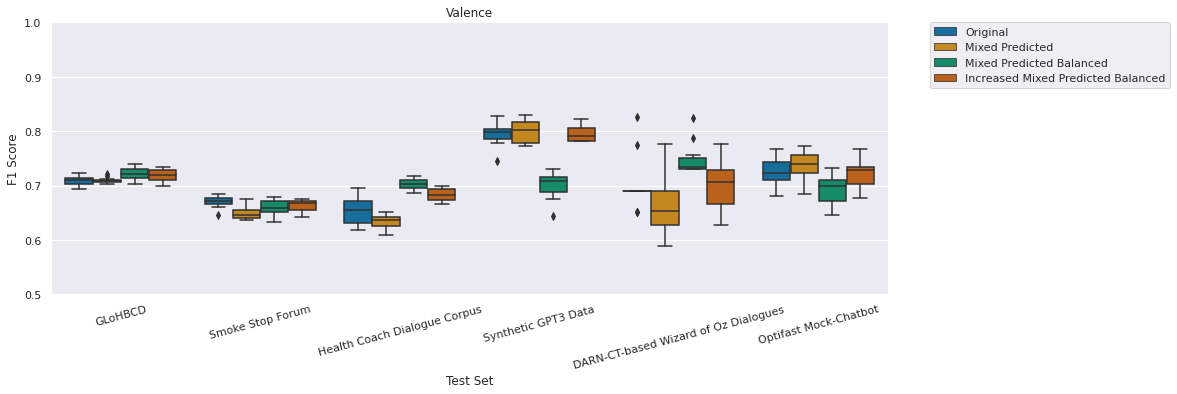

In [8]:
sns.set(rc={"figure.figsize":(15, 5)})
sns.set_palette("colorblind")
ax = sns.boxplot(x="Unnamed: 1", y="f1", hue="condition", data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Valence")
plt.xlabel("Test Set")
plt.ylim(0.5, 1)
plt.ylabel("F1 Score")
#plt.huelabel("Test Set")
#plt.style.use("dark_background")
plt.xticks(rotation = 15)
plt.savefig("performance_enhancement_valence.png", transparent=False, bbox_inches="tight")
plt.show()